In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

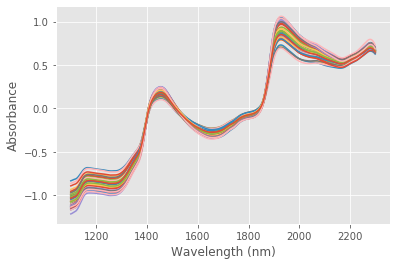

In [2]:
data = pd.read_csv('D:/data/csv/peach_spectra.csv')
X = data.values[:,1:]
y = data['Brix']
wl = np.arange(1100,2300,2) # wavelengths
# Plot absorbance spectra
with plt.style.context(('ggplot')):
    plt.plot(wl, X.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absorbance')
plt.show()

In [11]:
# Define the PCA object
pca = PCA()

# Preprocessing (1): first derivative
d1X = savgol_filter(X, 25, polyorder = 5, deriv=1)

# Preprocess (2) Standardize features by removing the mean and scaling to unit variance
Xstd = StandardScaler().fit_transform(d1X[:,:])

pc = 6

# Run PCA producing the reduced variable Xreg and select the first pc components
Xreg = pca.fit_transform(Xstd)[:,:pc]
Xreg

array([[-15.07237976, -15.92944924,  -7.72251595, -11.85470615,
          0.29718934,   2.9294096 ],
       [ -8.9722949 ,  18.94153599,   4.13186408,  -1.83749816,
         -2.88838403,   3.56831427],
       [-22.73347525,   8.40192653,  -2.77208384,  -1.62394463,
         -5.35111065,   4.84621099],
       [-13.14953445, -10.12127591,   2.48352134,  10.11597175,
         -3.00285246,   5.94747334],
       [-10.55053672,  -1.74856779,  -3.65652689,  -3.94045969,
          0.07122324,   4.87261094],
       [ 12.1229342 ,  -0.74070013,  -7.5932431 ,   5.9489198 ,
         -0.73766024,  15.06518759],
       [-13.46944962,   4.07405691,   0.77661234,  -4.38060055,
          3.38859889,   8.3211426 ],
       [-12.68131908,  21.49484063,   0.10672342,  -3.45900511,
         -3.63637488,   3.28029648],
       [-28.69021237,  -0.34187877,   8.18382066,  -4.02124972,
         -1.07853643,   1.08764777],
       [-26.90058893,  -6.00521424,   0.28104407,  -4.00943487,
          7.64401571,   2.1

In [12]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit
regr.fit(Xreg, y)

# Calibration
y_c = regr.predict(Xreg)

# Cross-validation
y_cv = cross_val_predict(regr, Xreg, y, cv=10)

# Calculate scores for calibration and cross-validation
score_c = r2_score(y, y_c)
score_cv = r2_score(y, y_cv)

# Calculate mean square error for calibration and cross validation
mse_c = mean_squared_error(y, y_c)
mse_cv = mean_squared_error(y, y_cv)
mse_c, mse_cv

(2.0709484290770304, 2.6622532913470276)

In [8]:
def pcr(X,y,pc):
    ''' Principal Component Regression in Python'''
    ''' Step 1: PCA on input data'''
    # Define the PCA object
    pca = PCA()
    # Preprocessing (1): first derivative
    d1X = savgol_filter(X, 25, polyorder = 5, deriv=1)
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    Xstd = StandardScaler().fit_transform(d1X[:,:])
    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(Xstd)[:,:pc]
    ''' Step 2: regression on selected principal components'''
    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Fit
    regr.fit(Xreg, y)
    # Calibration
    y_c = regr.predict(Xreg)
    # Cross-validation
    y_cv = cross_val_predict(regr, Xreg, y, cv=10)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

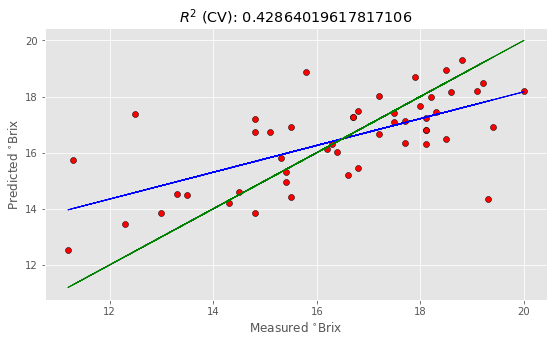

In [10]:
predicted, r2r, r2cv, mser, mscv = pcr(X,y, pc=6)
# Regression plot
z = np.polyfit(y, predicted, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y, predicted, c='red', edgecolors='k')
    ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (CV): '+str(r2cv))
    plt.xlabel('Measured $^{\circ}$Brix')
    plt.ylabel('Predicted $^{\circ}$Brix')
    plt.show()

## Credits & Links

https://nirpyresearch.com/principal-component-regression-python/